In [ ]:
# LECTURE ET TRAITEMENT

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définition des chemins vers les données d'entraînement et de test
train_dir = "C:/Users/MAREME/Desktop/M2/dataset/train"
test_dir = "C:/Users/MAREME/Desktop/M2/dataset/test"

# Création des générateurs d'images avec prétraitement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')  # fill_mode pour la gestion des pixels ajoutés lors de la rotation ou du décalage

test_datagen = ImageDataGenerator(rescale=1./255)

# Paramètres
batch_size = 32
image_size = (150, 150)

# Chargement des données d'entraînement et de test avec prétraitement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale')  # Conversion en échelle de gris

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale')  # Conversion en échelle de gris

# Création du modèle CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),  # Couche d'entrée en échelle de gris
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)


Found 5232 images belonging to 2 classes.
Found 625 images belonging to 2 classes.
Epoch 1/20


C:\Users\MAREME\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.7306 - loss: 0.5950 - val_accuracy: 0.6283 - val_loss: 0.7181
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8125 - loss: 0.4779 - val_accuracy: 0.4706 - val_loss: 0.9140
Epoch 3/20


C:\Users\MAREME\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


163/163 ━━━━━━━━━━━━━━━━━━━━ 156s 938ms/step - accuracy: 0.7348 - loss: 0.5537 - val_accuracy: 0.6859 - val_loss: 0.5438
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.8438 - loss: 0.3743 - val_accuracy: 0.7059 - val_loss: 0.4761
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 157s 945ms/step - accuracy: 0.7720 - loss: 0.4756 - val_accuracy: 0.6447 - val_loss: 0.6302
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.6250 - loss: 0.7553 - val_accuracy: 0.7059 - val_loss: 0.5749
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 159s 960ms/step - accuracy: 0.7912 - loss: 0.4370 - val_accuracy: 0.8010 - val_loss: 0.4417
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.8750 - loss: 0.3312 - val_accuracy: 0.5882 - val_loss: 0.7506
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.8272 - loss: 0.3861 - val_accuracy: 0.7977 - val_loss: 0.4575
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7500 - loss: 0.4251 - val_acc

In [ ]:
# 30 PREMIERES IMAGES DEJA TRAITEES 

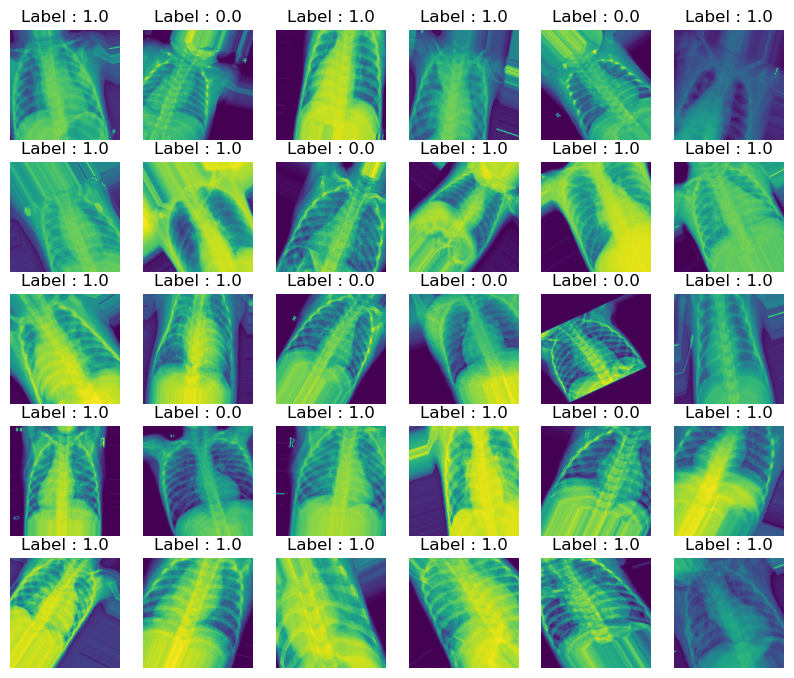

In [15]:
import matplotlib.pyplot as plt
# Affichage des images d'entraînement
plt.figure(figsize=(10, 10))
for i in range(30):
    batch = next(train_generator)  # Utiliser next() pour extraire un lot
    image = batch[0][0]  # Récupérer la première image du lot
    label = batch[1][0]  # Récupérer l'étiquette de la première image
    plt.subplot(6, 6, i + 1)
    plt.imshow(image)
    plt.title('Label : {}'.format(label))
    plt.axis('off')
plt.show()

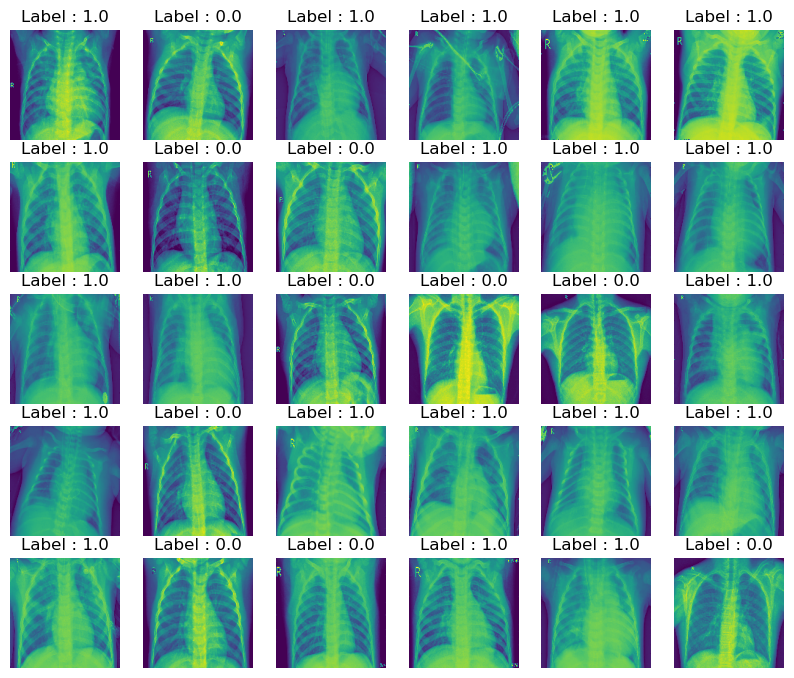

In [14]:
# Affichage des images de test
plt.figure(figsize=(10, 10))
for i in range(30):
    batch = next(test_generator)  # Utiliser next() pour extraire un lot
    image = batch[0][0]  # Récupérer la première image du lot
    label = batch[1][0]  # Récupérer l'étiquette de la première image
    plt.subplot(6, 6, i + 1)
    plt.imshow(image)
    plt.title('Label : {}'.format(label))
    plt.axis('off')
plt.show()

In [ ]:
# MODELE

In [16]:
model.save('modele_ml.h5')
model = tf.keras.models.load_model('modele_ml.h5')

In [29]:
from tensorflow.keras.preprocessing import image
img_path = "C:/Users/MAREME/Desktop/M2/img/normal-enfant.png"
img = image.load_img(img_path, target_size=(250, 350))  # Redimensionnement de l'image
img_array = image.img_to_array(img) / 255.0  # Conversion de l'image en tableau numpy et normalisation
img_array = tf.expand_dims(img_array, 0)  # Ajout d'une dimension pour correspondre à la forme attendue par le modèle
img

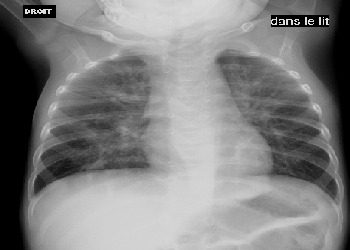

In [33]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 393.8 kB/s eta 0:01:38
   ---------------------------------------- 0.1/38.6 MB 655.4 kB/s eta 0:00:59
   ---------------------------------------- 0.2/38.6 MB 876.1 kB/s eta 0:00:44
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.6 MB 770.1 kB/s eta 0:00:50
   ---------------------------------------- 0.3/38.6 MB 729.7 kB/s eta 0:00:53
   ---------

In [40]:
import cv2
# Charger l'image en couleur
img_color = cv2.imread("C:/Users/MAREME/Desktop/M2/img/normal_enfant.png")
# Convertir l'image en niveaux de gris
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# Redimensionner l'image
img_gray_resized = cv2.resize(img_gray, (150, 150))
# Ajouter une dimension pour correspondre à la forme attendue par le modèle
img_gray_resized = img_gray_resized.reshape((1, 150, 150, 1))
# Normaliser les valeurs des pixels
img_gray_resized = img_gray_resized / 255.0
# Faire des prédictions avec le modèle
predictions = model.predict(img_gray_resized)
# Afficher le résultat de la prédiction
if predictions[0] > 0.5:
    print("Cette radiographie est celle d'un enfant atteint de pneumonie.")
else:
    print("Cette radiographie est celle d'un enfant normal.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Cette radiographie est celle d'un enfant normal.


In [43]:
# Charger l'image en couleur
img_color = cv2.imread("C:/Users/MAREME/Desktop/M2/img/pneumonie_enfant.png")
# Convertir l'image en niveaux de gris
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
# Redimensionner l'image
img_gray_resized = cv2.resize(img_gray, (150, 150))
# Ajouter une dimension pour correspondre à la forme attendue par le modèle
img_gray_resized = img_gray_resized.reshape((1, 150, 150, 1))
# Normaliser les valeurs des pixels
img_gray_resized = img_gray_resized / 255.0
# Faire des prédictions avec le modèle
predictions = model.predict(img_gray_resized)
# Afficher le résultat de la prédiction
if predictions[0] > 0.5:
    print("Cette radiographie est celle d'un enfant atteint de pneumonie.")
else:
    print("Cette radiographie est celle d'un enfant normal.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Cette radiographie est celle d'un enfant atteint de pneumonie.
